In [1]:
import numpy as np 
import pathlib 
import h5py
import os
import datetime 
import pandas as pd
import warnings
import scipy
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
# import seaborn_image as isns
sns.set_theme()
sns.set_style("whitegrid")
import os 
import napari
import skimage.measure
import copy
import math
import natsort
import joblib
from joblib import Parallel, delayed

import space
import plotting
import temporal
import utilities
import filehandling
import utilities
import unit_conversion
import contouring
from utilities import multicolour_reshape as reshape 
import signal_analysis
import data_objects

import pickle
from collections.abc import Iterable
# qgrid.enable() 
# import pandasgui
# import tabloo

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# %matplotlib widget
# plt.ioff()
# Lazy define some plotting params
chromatic_palette = ['red', 'green', 'blue', 'violet'] # R G B UV
rgbuv_palette = ['red', 'green', 'violet']
chromatic_hues = ["R", "G", "B", "UV"]

achromatic_palette = ['black', 'brown'] # BW BWnoUV 
achromatic_hues = ["BW", "BWnoUV"]
all_palette = chromatic_palette + achromatic_palette
all_hues = ["R", "G", "B", "UV", "BW", "BWnoUV"]
rguv_hues = ["R", "G", "UV"]
nanometers = ["588", "478", "422", "375"]
fish_palette = ["orange", "royalblue","blueviolet", "fuchsia"]

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
sns.set_context("notebook")
matplotlib.rcParams['svg.fonttype'] = 'none'

%reload_ext autoreload
%autoreload 2

In [2]:
roi = 10
plotting.visualise_summary(loadfile, roi)
plotting.chroma_overview(loadfile, roi);

NameError: name 'loadfile' is not defined

In [2]:
swn_files = filehandling.find_files_in(".h5" , "D:\Igor analyses", match_all = ["Colour", "SWN"], recursive=True)
swn_files

[WindowsPath('D:/Igor analyses/SWN/230613/0_0_ColorSWN_200_0/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('D:/Igor analyses/SWN/230613/0_1_ColorSWN_200_0/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath('D:/Igor analyses/SWN/230614/0_1_ColorSWN_200_0/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("D:/Igor analyses/SWN/230614/0_2_ColorSWN_200_0/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230718/0_1_ColorSWN_200_0/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('D:/Igor analyses/SWN/230718/0_4_ColorSWN_200_0/2023-7-18_ColourSWN_200_0_4.h5'),
 WindowsPath("D:/Igor analyses/SWN/230731/0_1_ColourSWN_200_0/2023-7-31_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230801/0_0_ColourSWN_0/2023-8-1_'0_0_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230802/0_1_ColourSWN_0/2023-8-2_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230802/0_1_ColourSWN_1H/2023-8-2_'0_1_ColourSWN_200_1H'.h5"),
 WindowsPath('D:/Igor ana

In [15]:
obj = data_objects.Data_STRF(swn_files[0])

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_project\data_objects.py:541: UserWarning: Rotation detected and corrected for D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0\2023-6-13_0_0_ColourSWN_200_0.h5
  self.strfs = load_strf(HDF5_file)


In [39]:
obj.ipl_depths

array([74., 10., 48., 67., 90., 77., 13., 32., 92., 53., 65., 85., 38.,
       13., 74., 58., 84., 19., 75., 62., 39., 83., 21., 93., 62., 40.,
       76., 91., 19., 57.,  4., 44., 78., 33., 15., 77., 55., 17., 30.,
       81., 21., 11., 57., 74., 22., 89., 51., 34., 12., 53., 79., 34.,
       92., 64., 85., 11., 86., 49., 67.], dtype=float32)

Have changed paramteres within polarity_neat inside filehandling.py to force polarity depending on which "side" of the tuple a signal is detected, regardless of whether that signals has a postiive polarity or negative polarity. Not sure yet if this is a good solution and requires manually going through examples. Additionally, noted that object.polarity_category() assigns 'off' when everything is nans, so need to look into that.

All in all, should think about whether the underlying polarity "engine" ise the way to go about this, as there is quite a lot of bugs and exceptions here. 


In [49]:
filehandling.picklestore_objects(swn_files, r"D:\New_pkls\24March17")

Iterating through, loading, and storing listed files as objects:   0%|          | 0/16 [00:00<?, ?it/s]

Output()

In [3]:
user = pathlib.Path(os.getcwd()).parts[2]
pkl_files = filehandling.find_files_in(".pkl", fr"C:\Users\{user}\OneDrive\Universitet\PhD\Pickles\New_pkls")
# pkl_files = filehandling.find_files_in(".pkl", r"D:\New_pkls")
pkl_files
# user

[WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-14_0_0_SWN_200_Colours.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-7_0_0_ColourSWN_200.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-7_0_2_ColourSWN_200_1.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-7_0_4_ColourSWN_200.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-7_MP_0_3_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-11-8_MP_0_0_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-6-13_0_0_ColourSWN_200_0.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-6-13_0_1_ColourSWN_200_0.pkl'),
 WindowsPath("C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/New_pkls/2023-6-14_'0_2_ColourSWN_200_0'.pkl")

In [4]:
# user = pathlib.Path(os.getcwd()).parts
pkl_files = filehandling.find_files_in(".pkl", r"D:\New_pkls\24March17")
# user
pkl_files

[WindowsPath('D:/New_pkls/24March17/2023-11-14_0_0_SWN_200_Colours.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-11-7_0_0_ColourSWN_200.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-11-7_0_2_ColourSWN_200_1.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-11-7_0_4_ColourSWN_200.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-11-7_MP_0_3_ColourSWN_200_.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-11-8_MP_0_0_ColourSWN_200_.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-6-13_0_0_ColourSWN_200_0.pkl'),
 WindowsPath('D:/New_pkls/24March17/2023-6-13_0_1_ColourSWN_200_0.pkl'),
 WindowsPath("D:/New_pkls/24March17/2023-6-14_'0_2_ColourSWN_200_0'.pkl"),
 WindowsPath('D:/New_pkls/24March17/2023-6-14_SMP_0_2_ColourSWN_200_0.pkl'),
 WindowsPath("D:/New_pkls/24March17/2023-7-18_'0_1_ColourSWN_200_0'.pkl"),
 WindowsPath('D:/New_pkls/24March17/2023-7-18_ColourSWN_200_0_4.pkl'),
 WindowsPath("D:/New_pkls/24March17/2023-7-31_'0_1_ColourSWN_200_0'.pkl"),
 WindowsPath("D:/New_pkls/24March17/2023-8

In [56]:
loaded = filehandling.load_pkl(pkl_files[0])

In [57]:
dir(loaded)

['_Data__compare_ops_map',
 '_Data__keyword_lables',
 '_Data__skip_first_frames',
 '_Data__skip_last_frames',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_pval_space',
 '_pval_time',
 'amplitude_tuning_functions',
 'area_tuning_functions',
 'averages',
 'calc_LED_offset',
 'calculate_average_images',
 'centroid_tuning_functions',
 'check_ipl_orientation',
 'collapse_times',
 'contours',
 'contours_area',
 'contours_centres',
 'contours_centres_by_pol',
 'contours_centroids',
 'contours_complexities',
 'contours_count',
 'data_types',
 'do_bo

In [62]:
pkl_files

[WindowsPath('D:/New_pkls/2023-11-14_0_0_SWN_200_Colours.pkl'),
 WindowsPath('D:/New_pkls/2023-11-7_0_0_ColourSWN_200.pkl'),
 WindowsPath('D:/New_pkls/2023-11-7_0_2_ColourSWN_200_1.pkl'),
 WindowsPath('D:/New_pkls/2023-11-7_0_4_ColourSWN_200.pkl'),
 WindowsPath('D:/New_pkls/2023-11-7_MP_0_3_ColourSWN_200_.pkl'),
 WindowsPath('D:/New_pkls/2023-11-8_MP_0_0_ColourSWN_200_.pkl'),
 WindowsPath('D:/New_pkls/2023-6-13_0_0_ColourSWN_200_0.pkl'),
 WindowsPath('D:/New_pkls/2023-6-13_0_1_ColourSWN_200_0.pkl'),
 WindowsPath("D:/New_pkls/2023-6-14_'0_2_ColourSWN_200_0'.pkl"),
 WindowsPath('D:/New_pkls/2023-6-14_SMP_0_2_ColourSWN_200_0.pkl'),
 WindowsPath("D:/New_pkls/2023-7-18_'0_1_ColourSWN_200_0'.pkl"),
 WindowsPath('D:/New_pkls/2023-7-18_ColourSWN_200_0_4.pkl'),
 WindowsPath("D:/New_pkls/2023-7-31_'0_1_ColourSWN_200_0'.pkl"),
 WindowsPath("D:/New_pkls/2023-8-1_'0_0_ColourSWN_200_0'.pkl"),
 WindowsPath("D:/New_pkls/2023-8-2_'0_1_ColourSWN_200_0'.pkl"),
 WindowsPath("D:/New_pkls/2023-8-2_'0_1_Colo

In [94]:
test_a = dict()

In [96]:
test_dict = filehandling.load_pkl(pkl_files[0]).__dict__
keys = test_dict.keys()

In [97]:
[test_dict.pop(key, test_a) for key in keys]

RuntimeError: dictionary changed size during iteration

In [17]:
roi_df, rec_df, chroma_df = filehandling.compile_chroma_strf_df(pkl_files[0:1], do_bootstrap = True) #, store_objects="D:\Pickles")
# roi_df, rec_df, chroma_df = filehandling.compile_chroma_strf_df(files, do_bootstrap = True, store_objects="D:\Pickles")
# Clearly, IPL_depths nan-ing is borked so you MUST have it otherwise the DFs are not the same size. Not bad, but a bit confusing
#rec_df.to_pickle(r"D:\DataFrames\rec_df.pkl") 
#chroma_df.to_pickle(r"D:\DataFrames\chroma_df.pkl")

Current file: D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_Colours.pkl
The following files are missing key 'Positions' resulting in np.nan for 'ipl_depths':
 
 []


In [15]:
chroma_df

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588
0,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_0,11-14-2023_STRF0_0,200,95.0,True,0.000000,...,1.105,1.105,0.000,0.000,0.000,0.00,0.0,0.0,-1.0,-1.0
1,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_1,11-14-2023_STRF0_1,200,81.0,True,-2.119513,...,0.000,1.040,1.235,0.000,0.000,0.00,1.0,0.0,0.0,-1.0
2,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_2,11-14-2023_STRF0_2,200,81.0,True,0.000000,...,0.000,0.975,0.000,0.000,0.000,0.00,0.0,0.0,0.0,-1.0
3,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_3,11-14-2023_STRF0_3,200,75.0,True,0.000000,...,1.040,0.975,0.000,0.000,0.845,0.00,0.0,0.0,2.0,-1.0
4,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_4,11-14-2023_STRF0_4,200,43.0,False,7.013024,...,0.000,0.000,0.975,0.910,1.040,1.04,1.0,1.0,1.0,1.0
5,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_5,11-14-2023_STRF0_5,200,42.0,False,3.045308,...,0.000,0.000,0.975,0.975,1.040,1.04,1.0,1.0,1.0,1.0
6,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_6,11-14-2023_STRF0_6,200,24.0,True,6.347869,...,0.000,0.000,0.910,0.000,0.000,1.04,1.0,0.0,0.0,1.0
7,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_7,11-14-2023_STRF0_7,200,26.0,True,5.630309,...,0.000,0.000,0.975,0.910,0.000,0.00,1.0,1.0,0.0,0.0
8,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_8,11-14-2023_STRF0_8,200,21.0,True,7.080145,...,0.000,0.910,0.910,0.845,0.000,0.00,1.0,2.0,0.0,-1.0
9,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\New_pkls\24March17\2023-11-14_0_0_SWN_200_C...,STRF0_9,11-14-2023_STRF0_9,200,23.0,True,5.840235,...,0.000,0.000,0.910,0.910,0.000,0.00,1.0,1.0,0.0,0.0


In [64]:
chroma_df.columns

Index(['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size',
       'ipl_depths', 'opp_bool', 'ampl_375', 'ampl_422', 'ampl_478',
       'ampl_588', 'area_375', 'area_422', 'area_478', 'area_588', 'cat_pol',
       'centneg_375', 'centneg_422', 'centneg_478', 'centneg_588',
       'centpos_375', 'centpos_422', 'centpos_478', 'centpos_588', 'comp_375',
       'comp_422', 'comp_478', 'comp_588', 'peakneg_375', 'peakneg_422',
       'peakneg_478', 'peakneg_588', 'peakpos_375', 'peakpos_422',
       'peakpos_478', 'peakpos_588', 'pol_375', 'pol_422', 'pol_478',
       'pol_588'],
      dtype='object')

In [ ]:
""" 
TODO


- Go through each index, pull the file path, load the file, and get the STRF 
- Organise that STRF data in a temporary a dictionary, where the key is the path name 
- 

"""


In [8]:
filehandling.load_pkl(chroma_df["curr_path"][0])

AttributeError: 'Data_STRF' object has no attribute 'frame_hz'

# Clustering 

In [47]:
# from sklearn.cluster import KMeans, OPTICS, DBSCAN, AgglomerativeClustering
# from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
# from sklearn.decomposition import PCA
# # Import the sklearn function
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
# from clustering import *

load_df = chroma_df.copy()
split_df = filehandling.split_df_by(load_df, "cat_pol")

### Data exploration 

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_22572\3327149436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = load_df.corr()


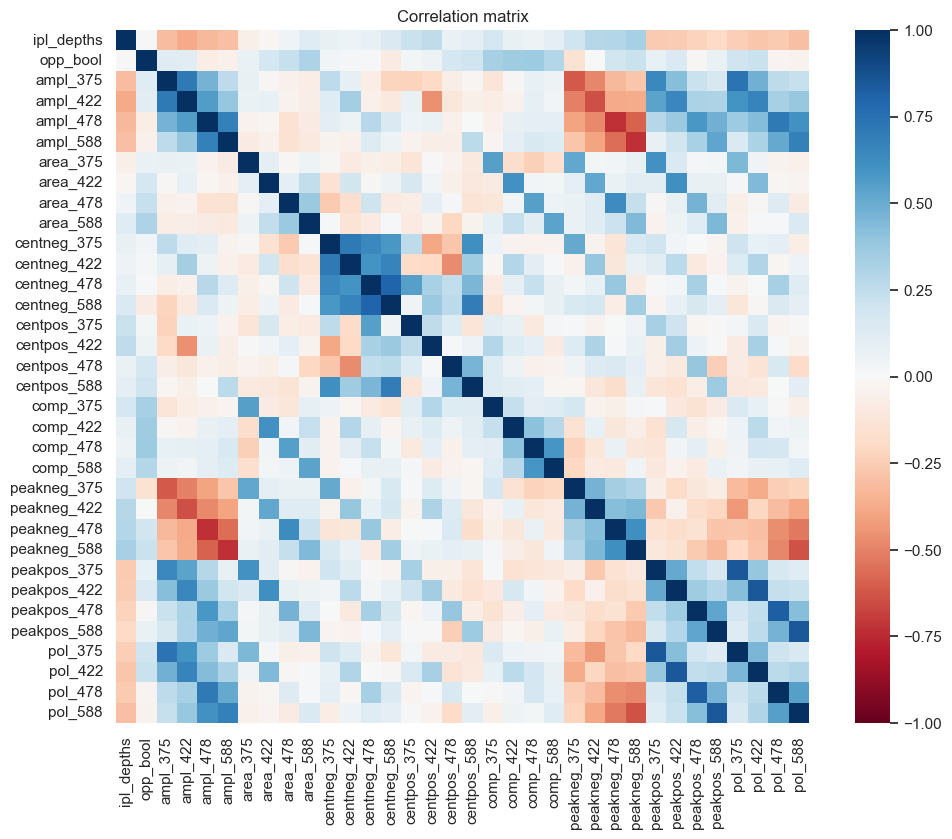

In [328]:
corrmat = load_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax = 1, vmin = -1, square=True, cmap="RdBu")
plt.title("Correlation matrix");

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_22572\825839970.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = load_df.cov()


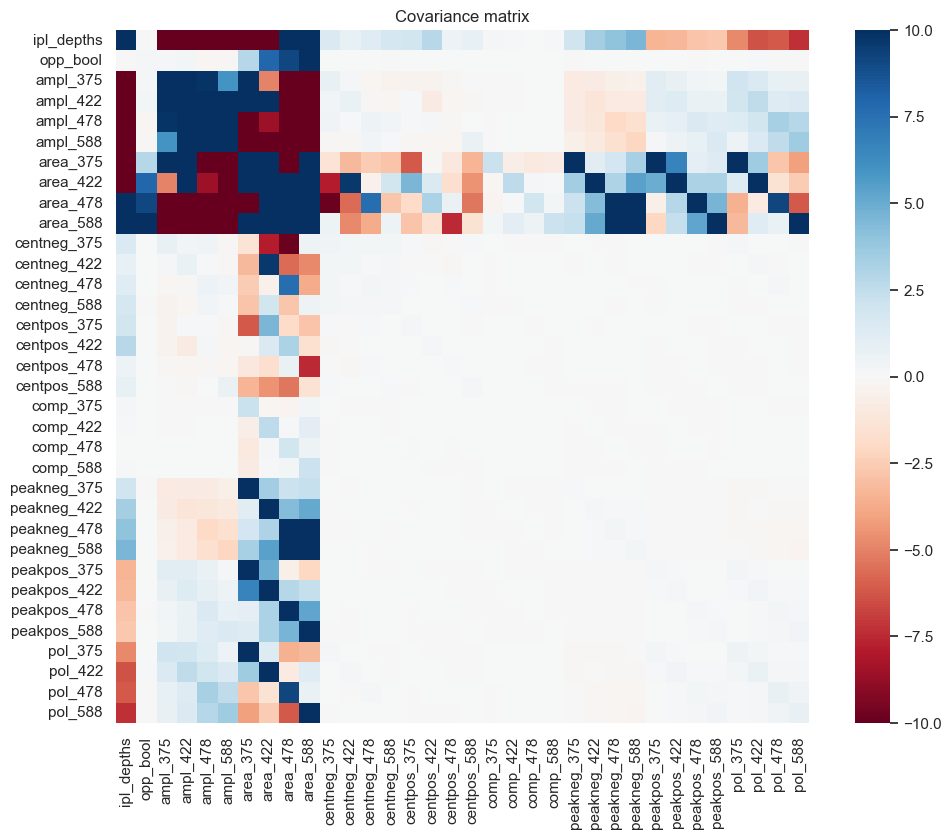

In [329]:
corrmat = load_df.cov()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin = -10, vmax = 10, square=True, cmap="RdBu")
plt.title("Covariance matrix");

Assumptions for PCA according to paper:
1. Underlying patterns must exist and be independent of one another 
2. Must combine linearly to form observed data (linear relationship)
3. Data must contain exclusively these patterns and additive, uncorrelated noise 
4. Observations must be independent

Check and justification:
1. as


[]

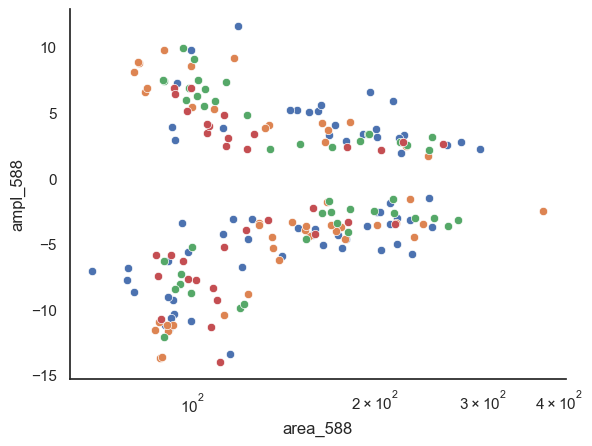

In [15]:
fig, ax = plt.subplots()
for i in ["588", "478", "422", "375"]:
    sns.scatterplot(load_df, x = f"area_{i}", y = f"ampl_{i}", ax= ax)
#ax.set_yscale("log")
ax.semilogx()

## Cluster

## Post-PCA Clustering

In [44]:
load_df

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588
0,2023-11-14,D:\Igor analyses\231114\2023-11-14_0_0_SWN_200...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_0,11-14-2023_STRF0_0,200,95.0,True,0.000000,...,1.105,1.105,0.000,0.00,0.000,0.000,0.0,0.0,-1.0,-1.0
1,2023-11-14,D:\Igor analyses\231114\2023-11-14_0_0_SWN_200...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_1,11-14-2023_STRF0_1,200,81.0,True,-2.119513,...,0.000,1.040,1.235,0.00,0.000,0.000,1.0,0.0,0.0,-1.0
2,2023-11-14,D:\Igor analyses\231114\2023-11-14_0_0_SWN_200...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_2,11-14-2023_STRF0_2,200,81.0,True,0.000000,...,0.000,0.975,0.000,0.00,0.000,0.000,0.0,0.0,0.0,-1.0
3,2023-11-14,D:\Igor analyses\231114\2023-11-14_0_0_SWN_200...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_3,11-14-2023_STRF0_3,200,75.0,True,0.000000,...,1.040,0.975,0.000,0.00,0.845,0.000,0.0,0.0,2.0,-1.0
4,2023-11-14,D:\Igor analyses\231114\2023-11-14_0_0_SWN_200...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_4,11-14-2023_STRF0_4,200,43.0,False,7.013024,...,0.000,0.000,0.975,0.91,1.040,1.040,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_20,08-02-2023_STRF0_20,200,83.0,True,0.000000,...,0.975,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,-1.0,0.0
488,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_21,08-02-2023_STRF0_21,200,61.0,True,0.000000,...,0.000,0.000,0.000,0.00,0.000,0.975,0.0,0.0,0.0,1.0
489,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_22,08-02-2023_STRF0_22,200,84.0,False,0.000000,...,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0
490,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_23,08-02-2023_STRF0_23,200,34.0,True,0.000000,...,0.780,0.000,0.000,0.00,1.170,0.000,0.0,0.0,2.0,0.0


In [45]:
import clustering

Automatic number determined as AIC = -11033.7777891804 landing on covariance_type = full with  13 n_components
Automatic number determined as AIC = -18020.82090199441 landing on covariance_type = full with  5 n_components
Automatic number determined as AIC = -21262.437047354775 landing on covariance_type = full with  10 n_components
Automatic number determined as AIC = -6838.434506167703 landing on covariance_type = full with  6 n_components


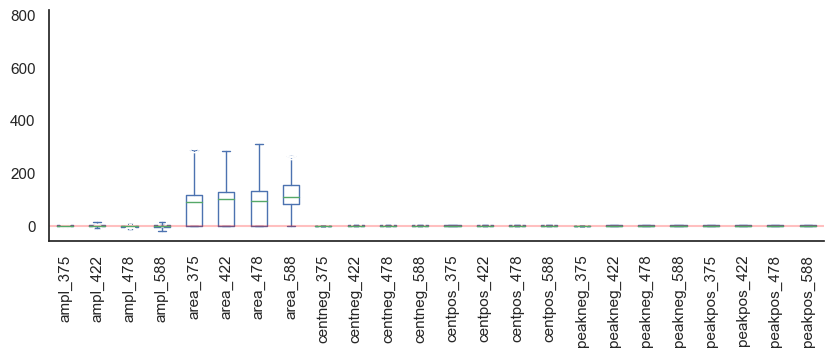

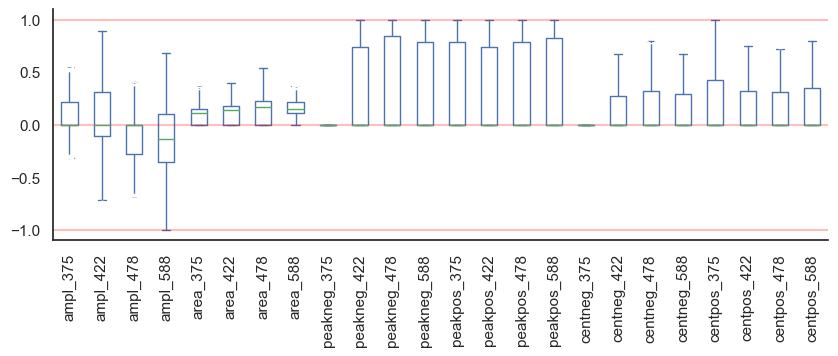

In [46]:
pca_df, scaled_df, stats_df, pca_results = clustering.run_clustering(load_df)

In [135]:
def validate_pca(pca_df, stats_df):
    ## Test for whether the clustering reflects individual experiments or not
    test_dict = {}
    path_list = []
    path_counts = []
    dates = []
    date_counts = []
    for i in pd.unique(pca_df["cluster"]):
        pd_paths = stats_df.query(f"cluster == {i}")["path"]
        pd_dates = stats_df.query(f"cluster == {i}")["date"]
        path_list.append(pd.unique(pd_paths))
        path_counts.append(len(pd_paths))
        dates.append(pd_dates)
        date_counts.append(len(pd.unique(pd_dates)))
    test_dict["paths_list"] = path_list
    test_dict["dates"] = dates
    test_dict["paths_n"] = path_counts
    test_dict["unique_paths"] = stats_df.groupby('cluster')['path'].nunique()
    test_dict["unique_dates"] = stats_df.groupby('cluster')['path'].nunique()
    return pd.DataFrame(test_dict)

validate_pca(pca_df, stats_df)

,paths_list,dates,paths_n,unique_paths,unique_dates
cluster,,,,,
0,[D:\Igor analyses\231114\2023-11-14_0_0_SWN_20...,3 2023-11-14 154 2023-11-07 169 202...,10,4,4
1,[D:\Igor analyses\231114\2023-11-14_0_0_SWN_20...,8 2023-11-14 166 2023-11-07 257 202...,9,6,6
2,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,13 2023-11-07 16 2023-11-07 69 202...,6,4,4
3,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,15 2023-11-07 23 2023-11-07 26 202...,13,6,6
4,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,18 2023-11-07 24 2023-11-07 28 202...,15,6,6
5,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,19 2023-11-07 29 2023-11-07 67 202...,8,3,3
6,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,21 2023-11-07 36 2023-11-07 73 202...,6,4,4
7,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,25 2023-11-07 45 2023-11-07 48 202...,13,9,9
8,[D:\Igor analyses\231107 rfs here\2023-11-7_0_...,33 2023-11-07 37 2023-11-07 99 202...,8,5,5


In [39]:
stats_df

,index,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,...,centneg_478,centneg_588,centpos_375,centpos_422,centpos_478,centpos_588,cluster_id,cluster,cat_pol,ipl_depths
0,0,0.000000,0.000000,-4.031718,-12.120250,0.000,0.000,128.321,105.857,0.0,...,1.439985,1.437573,0.000000,0.000000,0.000000,0.000000,off_1,14,off,95.0
1,1,-2.119513,0.000000,0.000000,-3.777072,128.290,0.000,0.000,127.863,0.0,...,0.000000,0.995385,2.077224,0.000000,0.000000,0.000000,opp_3,32,opp,81.0
2,2,0.000000,0.000000,0.000000,-6.011740,0.000,0.000,0.000,100.199,0.0,...,0.000000,0.870687,0.000000,0.000000,0.000000,0.000000,off_3,16,off,81.0
3,3,0.000000,0.000000,2.533350,-6.122260,0.000,0.000,292.663,110.872,0.0,...,1.213734,0.862496,0.000000,0.000000,1.394049,0.000000,mix_6,9,mix,75.0
4,4,7.013024,3.741768,7.789793,9.699354,99.498,147.295,93.706,89.678,0.0,...,0.000000,0.000000,1.381446,1.185347,1.448002,1.578503,on_1,21,on,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,485,0.000000,0.000000,0.000000,1.885557,0.000,0.000,0.000,163.501,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.622571,on_3,23,on,14.0
402,486,0.000000,2.564809,3.203802,-3.900229,0.000,142.619,109.147,206.943,0.0,...,0.000000,1.032926,0.000000,1.836200,1.792996,2.056231,mix_5,8,mix,30.0
403,487,0.000000,-3.602501,-6.267203,0.000000,0.000,91.226,101.136,0.000,0.0,...,0.846574,0.000000,0.000000,0.000000,0.000000,0.000000,off_4,17,off,83.0
404,488,0.000000,0.000000,0.000000,2.871972,0.000,0.000,0.000,106.099,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.481674,on_3,23,on,61.0


In [11]:
merged_stats_df.reset_index()

,index,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,...,centpos_478,centpos_588,cat_pol,pol_375,pol_422,pol_478,pol_588,cluster_id,ipl_depths,cluster
0,3,0.000000,0.000000,0.149160,-0.328384,0.000000,0.000000,0.510479,0.153917,0.0,...,0.402871,0.000000,mix,0.0,0.0,2.0,-1.0,mix_6,75.0,8
1,8,0.481507,0.297903,0.000000,-0.177365,0.135760,0.145526,0.000000,0.234640,0.0,...,0.000000,0.000000,mix,1.0,2.0,0.0,-1.0,mix_1,21.0,1
2,13,0.000000,-0.181742,0.146661,0.176834,0.000000,0.238864,0.391953,0.309864,0.0,...,0.408497,0.408944,mix,0.0,2.0,1.0,1.0,mix_5,26.0,7
3,15,0.000000,0.000000,0.000000,-0.098776,0.000000,0.000000,0.000000,0.293403,0.0,...,0.000000,0.446425,mix,0.0,0.0,0.0,2.0,mix_7,44.0,9
4,16,0.000000,0.207297,-0.203622,0.177527,0.000000,0.266114,0.417590,0.233195,0.0,...,0.540188,0.386687,mix,0.0,2.0,2.0,1.0,mix_5,24.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,290,0.521039,0.000000,0.000000,-0.214848,0.136928,0.000000,0.000000,0.194834,0.0,...,0.000000,0.000000,opp,1.0,0.0,0.0,-1.0,opp_3,61.0,33
402,291,0.415536,0.000000,0.000000,-0.668765,0.141198,0.000000,0.000000,0.149467,0.0,...,0.000000,0.000000,opp,1.0,0.0,0.0,-1.0,opp_3,60.0,33
403,305,0.287281,0.402077,-0.329705,-0.559719,0.200636,0.178053,0.180754,0.145618,0.0,...,0.000000,0.000000,opp,1.0,1.0,-1.0,-1.0,opp_0,10.0,30
404,319,0.473579,0.000000,-0.221019,0.000000,0.135371,0.000000,0.324531,0.000000,0.0,...,0.000000,0.000000,opp,1.0,0.0,-1.0,0.0,opp_0,30.0,30


In [285]:
filehandling.find_files_in(".smh", r"D:/", match_any=["25"], recursive=True)

[WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$I325ERC.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$R325ERC.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210615/6.15 Moving bars/Bar_250.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210615/6.15 Moving bars/Bar_250_2xvel.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210615/6.15 Moving bars/Bar_250_2xvel_1.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210622/L3 Line 125 6 x 6.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210622/Lines 250 5x5 1.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728374681-1001/$ROXY7MK/20210622/Lines 250 5x5.smh'),
 WindowsPath('D:/$RECYCLE.BIN/S-1-5-21-2931986140-3682962878-2728

In [297]:
import data_helpers 
with h5py.File(r"D:\Igor analyses\230505\2023-5-5_MP_0_1_SWN_R_25_.h5") as file:
    arr = np.copy(data_helpers.load_strf(file))

In [12]:
org_stats_df

,index,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,...,centneg_478,centneg_588,centpos_375,centpos_422,centpos_478,centpos_588,cluster_id,cluster,cat_pol,ipl_depths
0,0,0.000000,0.000000,-4.031718,-12.120250,0.000,0.000,128.321,105.857,0.0,...,1.439985,1.437573,0.000000,0.000000,0.000000,0.000000,off_1,13,off,95.0
1,1,-2.119513,0.000000,0.000000,-3.777072,128.290,0.000,0.000,127.863,0.0,...,0.000000,0.995385,2.077224,0.000000,0.000000,0.000000,opp_3,33,opp,81.0
2,2,0.000000,0.000000,0.000000,-6.011740,0.000,0.000,0.000,100.199,0.0,...,0.000000,0.870687,0.000000,0.000000,0.000000,0.000000,off_3,15,off,81.0
3,3,0.000000,0.000000,2.533350,-6.122260,0.000,0.000,292.663,110.872,0.0,...,1.213734,0.862496,0.000000,0.000000,1.394049,0.000000,mix_6,8,mix,75.0
4,4,7.013024,3.741768,7.789793,9.699354,99.498,147.295,93.706,89.678,0.0,...,0.000000,0.000000,1.381446,1.185347,1.448002,1.578503,on_11,21,on,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,485,0.000000,0.000000,0.000000,1.885557,0.000,0.000,0.000,163.501,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.622571,on_3,23,on,14.0
402,486,0.000000,2.564809,3.203802,-3.900229,0.000,142.619,109.147,206.943,0.0,...,0.000000,1.032926,0.000000,1.836200,1.792996,2.056231,mix_5,7,mix,30.0
403,487,0.000000,-3.602501,-6.267203,0.000000,0.000,91.226,101.136,0.000,0.0,...,0.846574,0.000000,0.000000,0.000000,0.000000,0.000000,off_4,16,off,83.0
404,488,0.000000,0.000000,0.000000,2.871972,0.000,0.000,0.000,106.099,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.481674,on_3,23,on,61.0


In [23]:
pca_dict[f"{cat}"]

PCA(n_components=24)

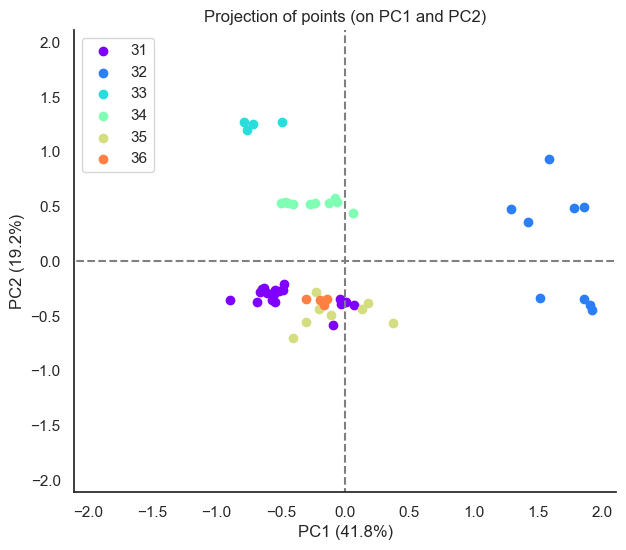

In [107]:
cat = "opp"
clustering.display_factorial_planes(pca_df.query(f"cat_pol == '{cat}'").to_numpy(), pca_results[f"{cat}"][0], [(0,1)], labels = pca_df.query(f"cat_pol == '{cat}'")["cluster"], 
    clust_labels = pca_df.query(f"cat_pol == '{cat}'")["cluster"], alpha = 1,  cmap = "rainbow")
# clustering.display_circles(merged_output_df.filter(like = "PC").to_numpy(), len(pd.unique(merged_output_df["cluster"])), output_pca, [(0, 1)], labels = merged_output_df["cluster"], lims = [-2,2,-2,2])
# plot_df_tuning(pruned_df_nonscale, pruned_df_bGMM, [0, 1])

[26 27 28 29 30 31]


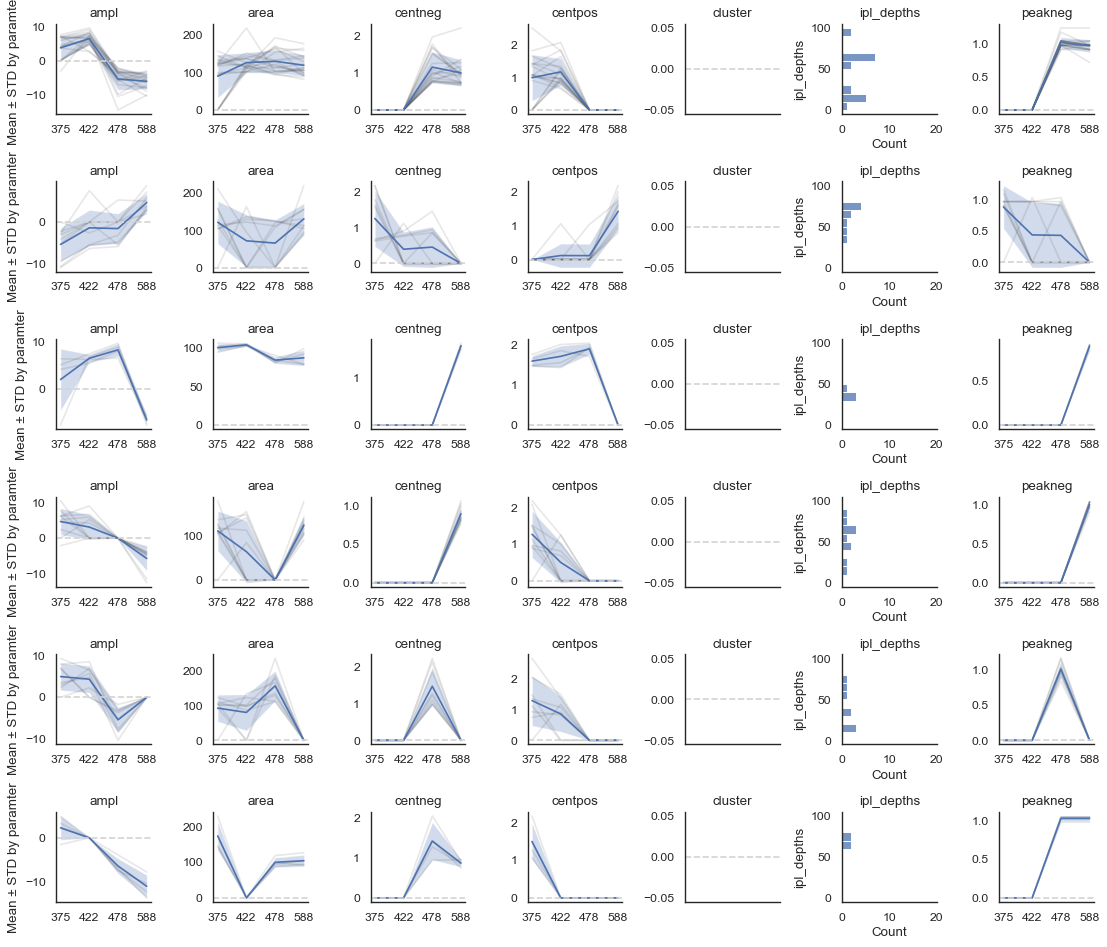

In [130]:
# # Vizualize n clusters
clust_labels = sorted(pd.unique(pca_df.query(f"cat_pol == '{cat}'")["cluster"]))
print(np.unique(clust_labels))
num_stats = 7
# # pruned_df.filter(regex = "ampl|area|cluster")
fig, ax = plt.subplots(len(clust_labels), num_stats, figsize = (num_stats*2, len(clust_labels)*2), dpi = 80)
for n, i in enumerate(clust_labels):
    plot_df_tuning(stats_df.query(f"cat_pol == '{cat}'").filter(regex = "ampl|area|cent|peak|ipl|cluster"), [i], ax = ax[n, 0:num_stats])
fig.tight_layout() #merged_stats_df

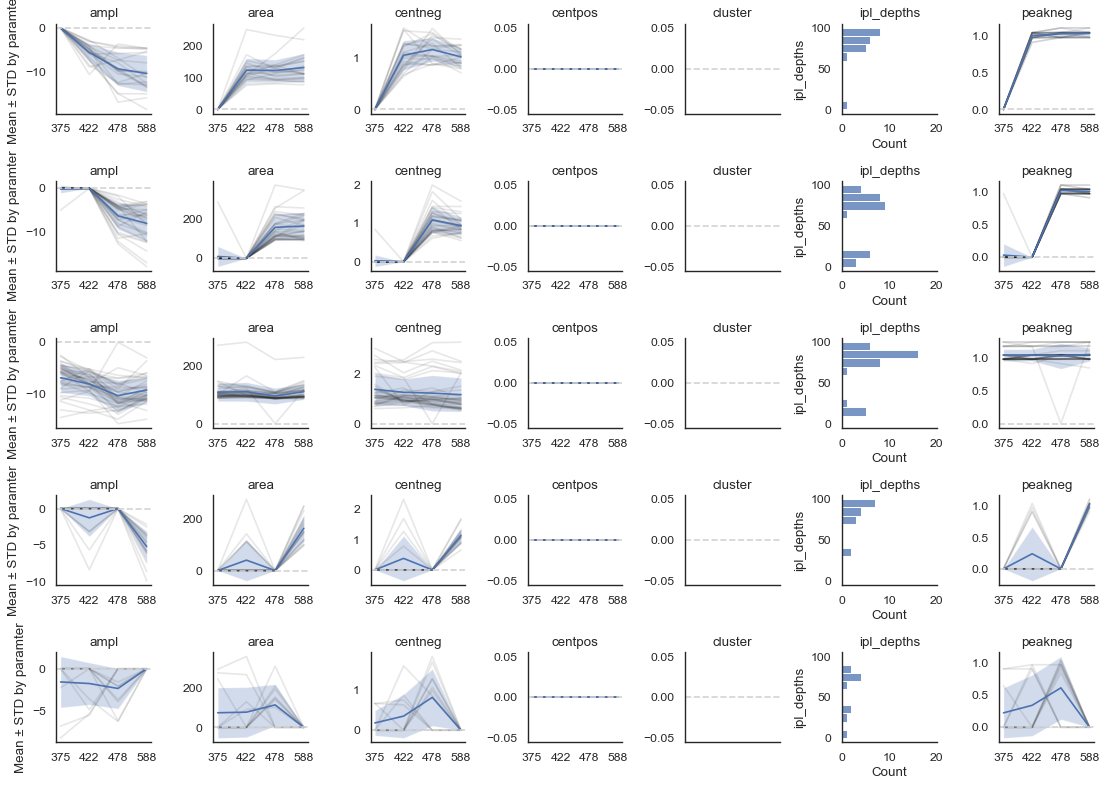

In [264]:
fig, ax = plt.subplots(len(clust_labels), num_stats, figsize = (num_stats*2, len(clust_labels)*2), dpi = 80)
for n, i in enumerate(clust_labels):
    plot_df_tuning(org_stats_df.query(f"cat_pol == '{cat}'").filter(regex = "ampl|area|cent|peak|ipl|cluster"), [i], ax = ax[n, 0:num_stats])
fig.tight_layout() #merged_stats_df

In [64]:
"""
TODO
- Get individual RFs by cluster
- The above plot but with option for passing raw data to clustering params --> can already do by labelling raw data?
        Either way, would be nice to be able to see both scaled and non-scaled representations, after clustering
- Need a script for getting the data from the raw STRFs that went into clustering, so I can plot averaged versions 
    by cluster type.
    --> Will require a bit of tinkering, as no raw STRF data is contained in the stats DFs. However, the file paths 
    should be there, so can go over and re-load pickled files as needed. 
- Implement seed for clustering wrappers
"""

'\nTODO\n- The above plot but with option for passing raw data to clustering params --> can already do by labelling raw data?\n        Either way, would be nice to be able to see both scaled and non-scaled representations, after clustering\n- Need a script for getting the data from the raw STRFs that went into clustering, so I can plot averaged versions \n    by cluster type.\n    --> Will require a bit of tinkering, as no raw STRF data is contained in the stats DFs. However, the file paths \n    should be there, so can go over and re-load pickled files as needed. \n'

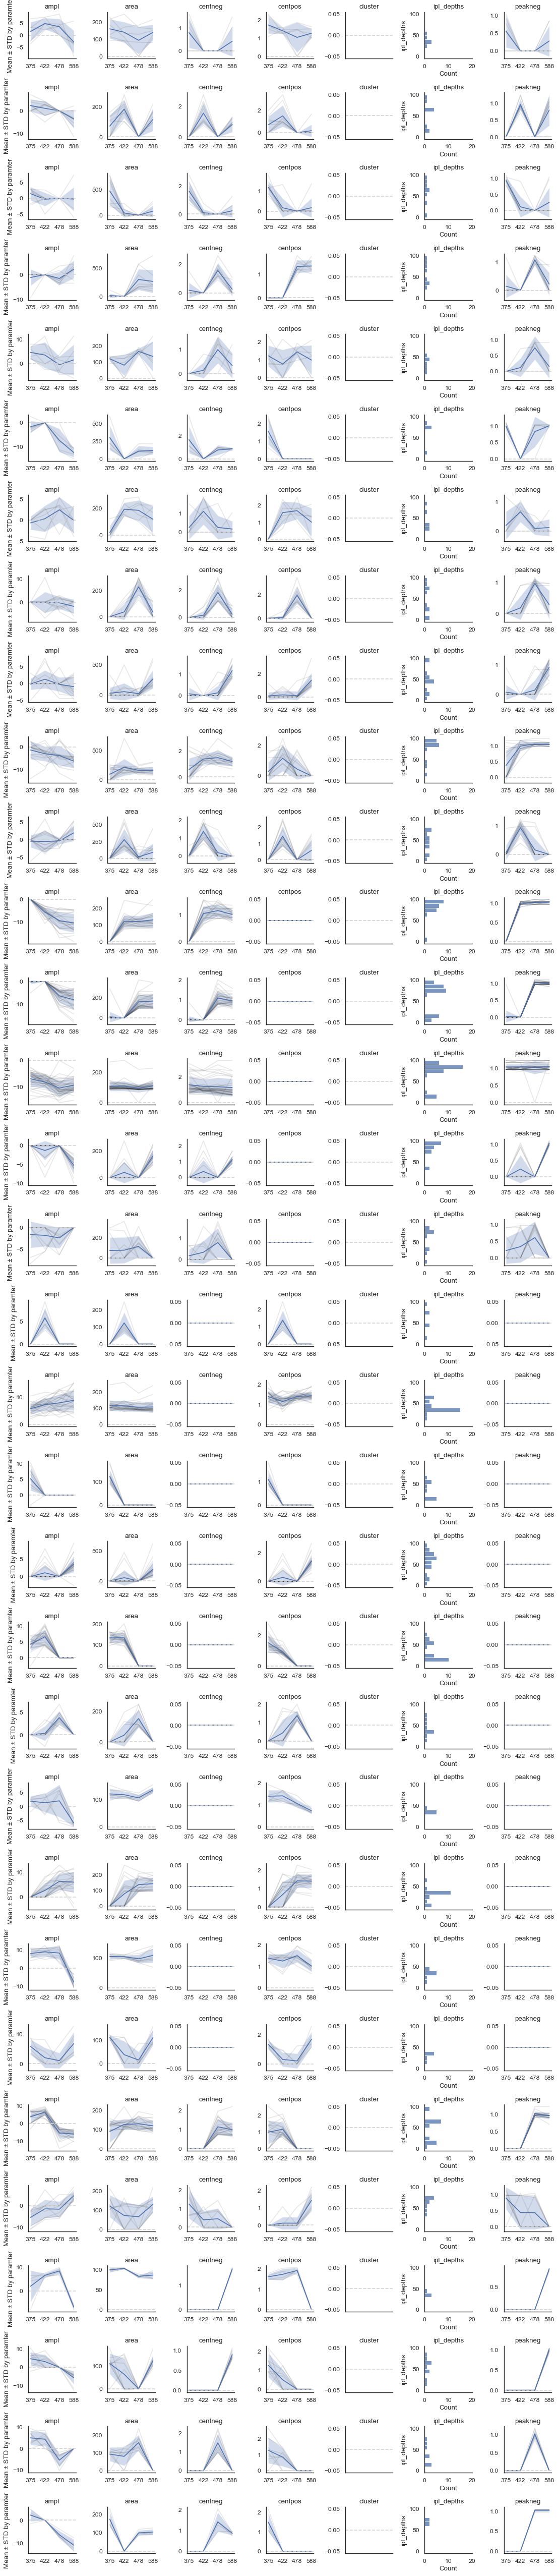

In [132]:
# # Vizualize n clusters
n_clust = len(pd.unique(scaled_df["cluster"]))
num_stats = 7
# pruned_df.filter(regex = "ampl|area|cluster")
fig, ax = plt.subplots(n_clust, num_stats, figsize = (num_stats*2, n_clust*2), dpi = 80)
for n, i in enumerate(range(n_clust)):
    plot_df_tuning(stats_df.filter(regex = "ampl|area|cent|peak|cluster|ipl"), i, ax = ax[n, 0:num_stats])
fig.tight_layout()

In [16]:
# ## Prepare data by cleaning and scaling, plus non scaled version of cleaned DF
# cluster_params = ["amp", "area", "peak", "cent"]
# # pruned_df[cols_like(["ampl"], pruned_df)]= sum_div_norm(pruned_df[cols_like(["ampl"], pruned_df)].values)
# pruned_df = prep_input_df(load_df, cluster_params, scaler = StandardScaler())
# ## Scale amplitude differentally
# # pruned_df[cols_like(["amp"], pruned_df)] = scale_data_points(pruned_df[cols_like(["amp"], pruned_df)])
# # Run PCA
# pruned_pca, pruned_df_pca = df_pca(pruned_df, whiten=True)
# # Run clustering on PCA result
# n_clust = 25
# pruned_df_clust = df_AggHierarchy(pruned_df_pca, n_clust)
# # Apply output by writing clusters to input data
# df_output = apply_clusters(pruned_df, pruned_df_clust)

## Create DF for visualising clustering results on original data
# stats_params =  ["ipl_depths"]
# stats_params.extend(clustering_params)
# stats_df = filehandling.split_df_by(load_df, "cat_pol")["off"]
# stats_df = prep_input_df(stats_df, stats_params, scaler = StandardScaler(), ignore_scale=cols_like([i for i in stats_params if i not in clustering_params], load_df))
# visualise_clust_df = apply_clusters(stats_df, merged_output_df)

# df_output["ipl_depths"] = visualise_clust_df["ipl_depths"].values


# plt.show()
# sns.boxplot(output_df, x = "cluster_id", y = "ipl_depths")
# plt.title("Distribution of cell IPL depth by cluster")
# # PCA for visualisation
clustering.display_factorial_planes(output_df.to_numpy(), pruned_pca, [(0,1)], labels = output_df["cluster_id"], 
    illustrative_var = output_df["cluster_id"], alpha = 1,  cmap = "rainbow")
# clustering.display_circles(pruned_df_pca.to_numpy(), 25, pruned_pca, [(0, 1)], labels = pruned_df_clust["cluster_id"], lims = [-2,2,-2,2])
# plot_df_tuning(pruned_df_nonscale, pruned_df_bGMM, [0, 1])

NameError: name 'output_df' is not defined

## TODO:
- [X] Figure out how to scale metrics independently, such that scaling is based in more "real" metrics (e.g., area cannot be negative). Don't worry too much about the spread in data/range, because the PCA step will take care of this and scale down to a comparative feature space
- [x] Create a metric for chromatic opponency such that equals: 'ON', 'OFF' or 'Mixed' depending on  (and 'Opponent?') tuning function
- [x] Then split data depending on this, such that you have a number of DFs equal to the number of above metric categories
- [X] Run PCA on data seperately, and combine cluster ID's into the original Dataframe such that cluster IDs are formatted:
    - ON_0, ON_1, etc... or Mixed_0, Mixed_1, etc...
    - Note: This means that there can be no ambigouity in the data! No cell must ever be in two groups, as this would break assigning of cluster_ID (at least in any sensible way)
- [ ] Implement a "delay" metric rather than peaktime, as this is more meaningful 
- [ ] "Stamp" or otherwise representative metrics collected from each cluster, presented as a single coherent plot 





^ Skrewing around with the clustering still. What I want to do is use MaxAbsScaler for some things like area but StanardScaler or otherwise for others. Need to look into sklearn pipelines, and maybe change the logic of prepping the DFs depending. 

Would be neat to be able to: 
- Give DF to cluster on 
- Give columns to use for clustering 
- Specficy columns to be scaled before clustering
- Specify how those columns are to be scaled 
- Return the entire DF after scaling and clustering with the cluster ID applied

Other notes for meeting:
- PG recordings --> Seems not bright enough, although also not very convincing with very bright Chrolis (Tess looking into this)
- Postponing PoorLabs switch until Tess tries neutral dentisty filters on Henry 
- Splitting by polarity then clustering --> Do I combine the PCAs first, or cluster everything seperate and just add together the cluster IDs?
- Can I apply scaling and transformations differently? 

In [ ]:
load_df["opp_bool"]

0      False
1       True
2       True
3      False
4       True
       ...  
476    False
477    False
478     True
479    False
480     True
Name: opp_bool, Length: 481, dtype: bool

In [ ]:
df_output

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,cluster_id
0,0.0,-0.226531,0.000000,-0.307263,0.0,0.385482,0.000000,0.319103,0.0,0.842105,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,9
1,0.0,0.000000,0.000000,-0.135996,0.0,0.000000,0.000000,0.279009,0.0,0.000000,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,20
2,0.0,-0.181742,0.146661,0.176834,0.0,0.238864,0.391953,0.309864,0.0,0.684211,0.000000,0.000000,0.0,0.947368,0.842105,0.842105,4
3,0.0,0.164371,-0.102937,0.000000,0.0,0.189804,0.290516,0.000000,0.0,0.000000,0.842105,0.000000,0.0,0.789474,0.000000,0.000000,5
4,0.0,0.000000,0.000000,-0.098776,0.0,0.000000,0.000000,0.293403,0.0,0.000000,0.000000,0.315789,0.0,0.000000,0.000000,0.894737,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,-0.430485,-0.343558,-0.300678,0.0,0.172560,0.234815,0.208112,0.0,0.842105,0.842105,0.842105,0.0,0.000000,0.000000,0.000000,23
390,0.0,0.184639,0.188636,-0.209199,0.0,0.201366,0.190380,0.287286,0.0,0.000000,0.000000,0.578947,0.0,0.789474,0.842105,0.894737,4
391,0.0,-0.259342,-0.369005,0.000000,0.0,0.128804,0.176407,0.000000,0.0,0.789474,0.789474,0.000000,0.0,0.000000,0.000000,0.000000,23
392,0.0,0.000000,0.000000,0.154046,0.0,0.000000,0.000000,0.147291,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.789474,21


In [ ]:
visualise_clust_df

,ipl_depths,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,cluster_id
0,88.0,0.572257,0.410041,0.567789,0.379022,0.0,0.385482,0.000000,0.319103,0.0,0.842105,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,9
1,90.0,0.572257,0.530132,0.567789,0.472728,0.0,0.000000,0.000000,0.279009,0.0,0.000000,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,20
2,26.0,0.572257,0.433785,0.651061,0.643889,0.0,0.238864,0.391953,0.309864,0.0,0.684211,0.000000,0.000000,0.0,0.947368,0.842105,0.842105,4
3,77.0,0.572257,0.617271,0.509343,0.547136,0.0,0.189804,0.290516,0.000000,0.0,0.000000,0.842105,0.000000,0.0,0.789474,0.000000,0.000000,5
4,44.0,0.572257,0.530132,0.567789,0.493092,0.0,0.000000,0.000000,0.293403,0.0,0.000000,0.000000,0.315789,0.0,0.000000,0.000000,0.894737,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,92.0,0.572257,0.301918,0.372720,0.382625,0.0,0.172560,0.234815,0.208112,0.0,0.842105,0.842105,0.842105,0.0,0.000000,0.000000,0.000000,23
390,30.0,0.572257,0.628015,0.674894,0.432676,0.0,0.201366,0.190380,0.287286,0.0,0.000000,0.000000,0.578947,0.0,0.789474,0.842105,0.894737,4
391,83.0,0.572257,0.392647,0.358272,0.547136,0.0,0.128804,0.176407,0.000000,0.0,0.789474,0.789474,0.000000,0.0,0.000000,0.000000,0.000000,23
392,61.0,0.572257,0.530132,0.567789,0.631421,0.0,0.000000,0.000000,0.147291,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.789474,21


TODO:

- Need to feature engineer a column that gives a boolean whether a cell is chromatically opponent or not